In [56]:
from pybaseball import team_batting, team_pitching
import pandas as pd

In [66]:
batting = team_batting(2019,2023)
pitching = team_pitching(2019, 2023)

In [67]:
batting = batting[['teamIDfg', 'WAR']]
pitching = pitching[['teamIDfg', 'W', 'WAR']]

data = pd.merge(batting, pitching, on='teamIDfg', suffixes=('_batting', '_pitching'))

In [72]:
X = data.drop(['teamIDfg', 'W'], axis=1)
y = data['W']

# Use Basic Linear Regression With Default Params

Here is the link to the documentation for [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state = 42) # Reproducable

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [114]:
from sklearn.metrics import *
import numpy as np

print('MSE', mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(mean_squared_error(y_test, predictions)))
print('\n\nThe model is off by about 13 wins')

MSE 181.38902640929382
RMSE 13.468074339314207


The model is off by about 13 wins


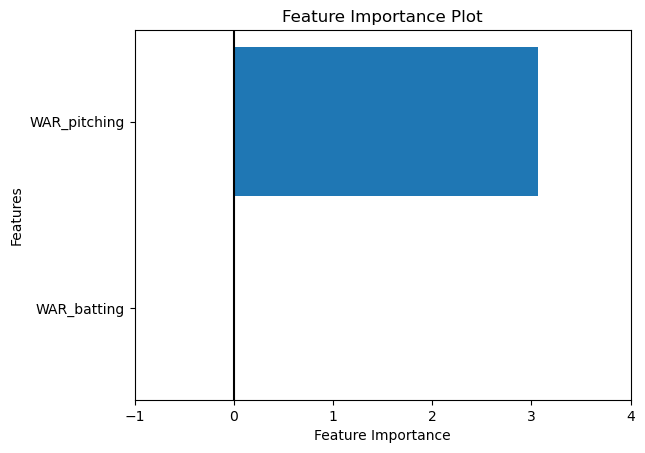

In [113]:
import matplotlib.pyplot as plt
coef = model.coef_
plt.barh(X.columns, coef)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.xlim(-1, 4)
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.axvline(x=0, color='black')
plt.show()


In [91]:
table = pd.read_html('https://www.fangraphs.com/depthcharts.aspx?position=Team')[6]
table = table[['Team', 'Bat', 'Pit']]
table.rename(columns={'Bat': 'WAR_batting', 'Pit': 'WAR_pitching'}, inplace=True)

X = table[['WAR_batting', 'WAR_pitching']]

pred = model.predict(X)


In [93]:
table['Wins'] = pred

In [95]:
table.sort_values(by='Wins', ascending=False)

,Team,WAR_batting,WAR_pitching,Wins
5,Phillies,22.1,21.3,97.664641
0,Braves,33.7,20.5,95.388860
1,Dodgers,30.8,20.2,94.425644
10,Twins,24.9,17.3,85.449755
6,Blue Jays,26.6,16.7,83.636907
4,Astros,30.9,16.5,83.089164
8,Mariners,25.0,16.3,82.386946
16,Marlins,16.6,16.3,82.259732
15,Giants,22.0,15.9,81.115783
17,Reds,18.6,15.9,81.064292
